In [23]:
import sys
sys.path.insert(0, "../")
import rebound
import numpy as np
from src.utilities.particle_production import EjectionVector
from src.utilities.constants import sec2year, rad2Deg, m2au, au2m
from pathlib import Path
import matplotlib.pyplot as plt

In [84]:
sec2year

31536000.0

In [92]:
file_name = Path('/Users/bethclark/Projects/Baptistina/out/2.324km_baps.bin').stem
size = file_name[:-7]
size

'2.324'

In [2]:
sa = rebound.SimulationArchive('/Users/bethclark/Projects/Baptistina/out/2.324km_baps.bin')

In [93]:
len(sa)

40001

In [4]:
interval = (sa[1].t - sa[0].t)/sec2year*1e-3
print(interval)

indx_5myr = []
for i, sim in enumerate(sa):
    if sim.t/sec2year*1e-3 % 5000 == 0:
        indx_5myr.append(i)
print(len(indx_5myr))

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


10.0
81


In [12]:
pm_range = 100 # want to average data over +/- 1million years

data = {}

for i in indx_5myr:
    osculating_data = {0:{'a':[], 'e':[], 'i':[]}, 1:{'a':[], 'e':[], 'i':[]}, 2:{'a':[], 'e':[], 'i':[]}, 3:{'a':[], 'e':[], 'i':[]}, 4:{'a':[], 'e':[], 'i':[]}, 5:{'a':[], 'e':[], 'i':[]}, 6:{'a':[], 'e':[], 'i':[]}, 7:{'a':[], 'e':[], 'i':[]}, 8:{'a':[], 'e':[], 'i':[]}, 9:{'a':[], 'e':[], 'i':[]}}
    sim = sa[i]
    ps = sim.particles
    if i < pm_range:
        for j in range(pm_range + 1):
            sim2 = sa[i+j]
            orbs = sim2.calculate_orbits(sim2.particles["Sun"])
            for k, orb in enumerate(orbs[7:]):
                osculating_data[k]['a'].append(orb.a*m2au)
                osculating_data[k]['e'].append(orb.e)
                osculating_data[k]['i'].append(np.sin(orb.inc))
    elif (len(sa)-i) < pm_range:
        for j in range(pm_range + 1):
            sim2 = sa[i-j]
            orbs = sim2.calculate_orbits(sim2.particles["Sun"])
            for k, orb in enumerate(orbs[7:]):
                osculating_data[k]['a'].append(orb.a*m2au)
                osculating_data[k]['e'].append(orb.e)
                osculating_data[k]['i'].append(np.sin(orb.inc))
    else:
        for j in range(pm_range + 1):
            sim2 = sa[i-j]
            orbs = sim2.calculate_orbits(sim2.particles["Sun"])
            for k, orb in enumerate(orbs[7:]):
                osculating_data[k]['a'].append(orb.a*m2au)
                osculating_data[k]['e'].append(orb.e)
                osculating_data[k]['i'].append(np.sin(orb.inc))
            sim2 = sa[i+j]
            orbs = sim2.calculate_orbits(sim2.particles["Sun"])
            for k, orb in enumerate(orbs[7:]):
                osculating_data[k]['a'].append(orb.a*m2au)
                osculating_data[k]['e'].append(orb.e)
                osculating_data[k]['i'].append(np.sin(orb.inc))
    
    data[sa[i].t/sec2year*1e-6] = {0:{'a':np.mean(osculating_data[0]['a']), 'e':np.mean(osculating_data[0]['e']), 'i':np.mean(osculating_data[0]['i'])}, 1:{'a':np.mean(osculating_data[1]['a']), 'e':np.mean(osculating_data[1]['e']), 'i':np.mean(osculating_data[1]['i'])}, 2:{'a':np.mean(osculating_data[2]['a']), 'e':np.mean(osculating_data[2]['e']), 'i':np.mean(osculating_data[2]['i'])}, 3:{'a':np.mean(osculating_data[3]['a']), 'e':np.mean(osculating_data[3]['e']), 'i':np.mean(osculating_data[3]['i'])}, 4:{'a':np.mean(osculating_data[4]['a']), 'e':np.mean(osculating_data[4]['e']), 'i':np.mean(osculating_data[4]['i'])}, 5:{'a':np.mean(osculating_data[5]['a']), 'e':np.mean(osculating_data[5]['e']), 'i':np.mean(osculating_data[5]['i'])}, 6:{'a':np.mean(osculating_data[6]['a']), 'e':np.mean(osculating_data[6]['e']), 'i':np.mean(osculating_data[6]['i'])}, 7:{'a':np.mean(osculating_data[7]['a']), 'e':np.mean(osculating_data[7]['e']), 'i':np.mean(osculating_data[7]['i'])}, 8:{'a':np.mean(osculating_data[8]['a']), 'e':np.mean(osculating_data[8]['e']), 'i':np.mean(osculating_data[8]['i'])}, 9:{'a':np.mean(osculating_data[9]['a']), 'e':np.mean(osculating_data[9]['e']), 'i':np.mean(osculating_data[9]['i'])}}

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [15]:
data['time'][10.0]

{0: {'a': 2.2790759636824447,
  'e': 0.1503056271010867,
  'i': 0.10265148624350211},
 1: {'a': 2.2437691107004203,
  'e': 0.14388369452568397,
  'i': 0.10577288673790936},
 2: {'a': 2.2452547220091286,
  'e': 0.14799068333541837,
  'i': 0.11458901120181811},
 3: {'a': 2.2657427824327514,
  'e': 0.15068190554827354,
  'i': 0.10679219070404186},
 4: {'a': 2.2649184863918106,
  'e': 0.15281174276946402,
  'i': 0.10557984897541975},
 5: {'a': 2.252388034860782,
  'e': 0.15098996054982475,
  'i': 0.10446039694577768},
 6: {'a': 2.260403670609049,
  'e': 0.14702306101260484,
  'i': 0.10533127072480106},
 7: {'a': 2.2740175188850555,
  'e': 0.15018650771300351,
  'i': 0.10578193244367165},
 8: {'a': 2.2761566262546924,
  'e': 0.15130522515371353,
  'i': 0.10302531560076475},
 9: {'a': 2.2722370722454093,
  'e': 0.15527915858512173,
  'i': 0.10254676509842792}}

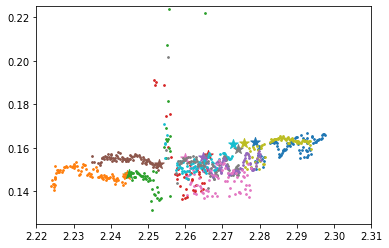

In [55]:
times = list(data.keys())
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

plt.figure()
plt.gca().set_xlim(-0.05 + 2.27, 0.04 + 2.27)
plt.gca().set_ylim(.125, 0.225)
# plt.gca().set_ylim(0, .125)
for time in times:
    for pnum in data[time]:
        plt.scatter(data[time][pnum]['a'], data[time][pnum]['e'], s = 3, c = colors[pnum])
        if time == times[0]:
            plt.scatter(data[time][pnum]['a'], data[time][pnum]['e'], s = 100, marker='*', c = colors[pnum])



In [49]:
list(mcolors.TABLEAU_COLORS.keys())[0]

'tab:blue'

In [82]:
size = 2.324
year = 400.0
for i in data[year]:
    a=data[year][i]['a']
    e=data[year][i]['e']
    inc=data[year][i]['i']
    p = (1-e)*a
    if a < 10 and a>0 and p>1.5:
        print('{}\t{}\t{}\t{}\t{}'.format(i, size, a, e, inc))

0	2.324	2.2976601183569247	0.16585562974247023	0.12055747899882907
1	2.324	2.2239144480699267	0.14251994240206242	0.12328466845761799
4	2.324	2.2803608660999655	0.15445371073718067	0.11021659241568815
5	2.324	2.234826628009396	0.15638790999669694	0.10859483988097972
6	2.324	2.2776962193250867	0.1504616057146934	0.11976633979375122
7	2.324	2.255272106565783	0.20163853172936533	0.11734452774304507
8	2.324	2.293838755039587	0.15943193023945496	0.12640711441297456
9	2.324	2.2544993128740884	0.1551695459529951	0.10192030115738611


In [79]:
(1-0.627009941717129)*26.746208316850137

9.976069798947742